In [333]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [334]:
df = pd.read_csv("laptop_data.csv")

In [335]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [336]:
df.shape

(1303, 12)

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [338]:
df.duplicated().sum()

np.int64(0)

so no duplicate values...

In [339]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

so no missing value, no pre- processing needed

preprocessing start

unnamed clumn removed, ram --> int , weight --> float..

In [340]:
df.drop(columns= ['Unnamed: 0'], inplace =True)

In [341]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')


In [342]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


ram and weight still object 


In [343]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight']= df['Weight'].astype('float32')

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


// data cleaning done..

data analysis start performing...(EDA starts)...
price pe karenege(will do on price first)
univariate analysis..

In [345]:
import seaborn as sns

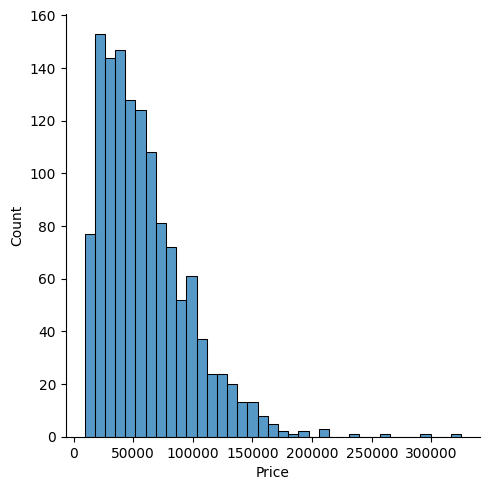

In [346]:
sns.displot(df['Price'])

distrbution of data.. laptop less price more and laptop price more less.. skewed data..
data skewed algo convering problem lets see...


<Axes: xlabel='Company'>

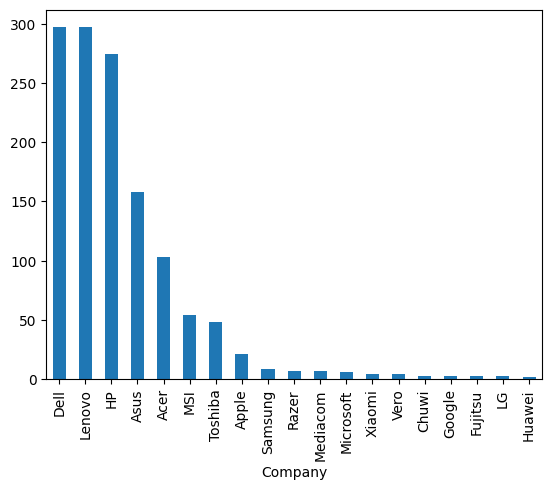

In [347]:
df['Company'].value_counts().plot(kind ='bar')

bar plots makes a bar of campony of taking the avrage of all the prices of that company came

In [348]:
# proving mathematically..

from scipy.stats import f_oneway

company_groups = [df['Price'][df['Company'] == comp] for comp in df['Company'].unique()]

# Perform the ANOVA test
f_statistic, p_value = f_oneway(*company_groups)

print(f"\nF-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value}")



F-statistic: 13.9425
P-value: 6.900836785322048e-39


some categories laptops are more....
// lets see if company name effects price..

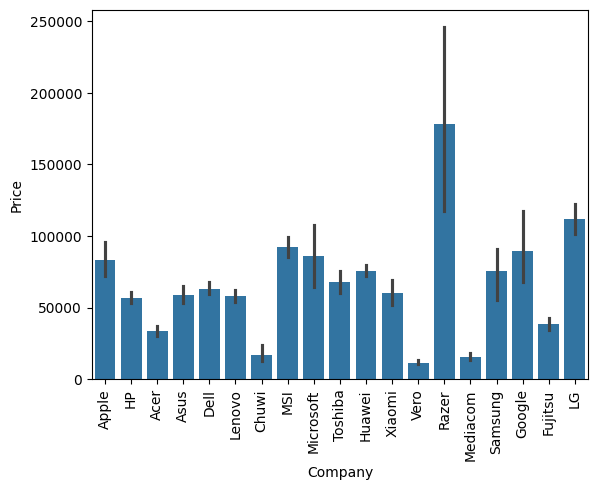

In [349]:
sns.barplot(x = df['Company'], y= df['Price']) # would not be able to see
# mathplot lib needed to come 
plt.xticks(rotation = 'vertical')
plt.show()

most costly razer karke haa...
lg laptops very expensive...
budget brands hp etc 
claealry we can see comapnies kee sath prices vary 
// depends on the comapny also... we can see fromt he graph..

// lets move on to next column 
// lets see how many types of laptps are there..

// black bar showing the confidence interval...( 95 percent by default)

// razer kee laptops prices vary significnatly... but other comapnies prices dont vary much..

// although we are seeing price is changing with company but lets prove it mathematically by mathematical tests


<Axes: xlabel='TypeName'>

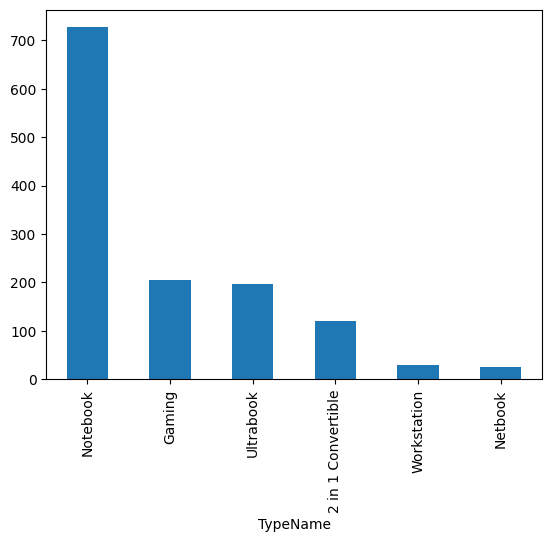

In [350]:
df['TypeName'].value_counts().plot(kind = 'bar')

6 type ke laptop haan... notebook he sabse jyada bikte haan kyuke yeeh budget range haa...
// but hume price or type ka nahi pata chala 
// we just got how many of eahc type...
// we will now check // averga evalue of each type...


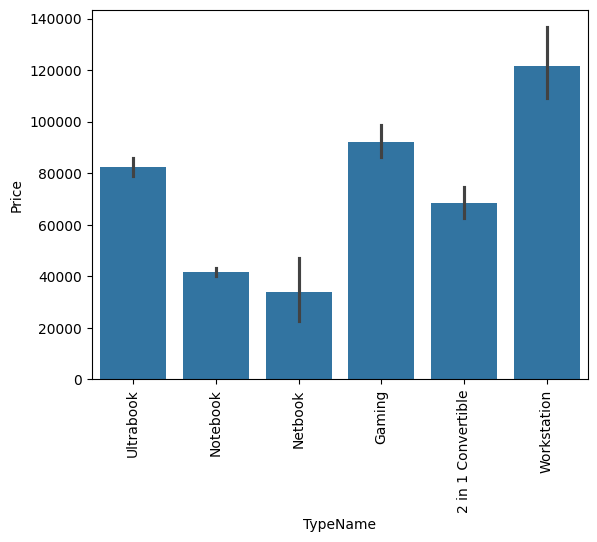

In [351]:
sns.barplot(x = df['TypeName'], y= df['Price']) # would not be able to see
# mathplot lib needed to come 
plt.xticks(rotation = 'vertical')
plt.show()

In [352]:
# proving mathemically 
from scipy.stats import f_oneway
type_groups = [df['Price'][df['TypeName'] == t] for t in df['TypeName'].unique()]

# Perform the ANOVA test
f_statistic, p_value = f_oneway(*type_groups)

print(f"\nF-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value}")


F-statistic: 161.0231
P-value: 2.955981663893258e-133


// tuu isse mujhe pata chala jiss type ka laptop lee raha usse price pe difference aayage...

// next_col is size col..(inches it called here... )

// pehla dekhta haan yeh kiss tarah se vary kar raha ha puraa..

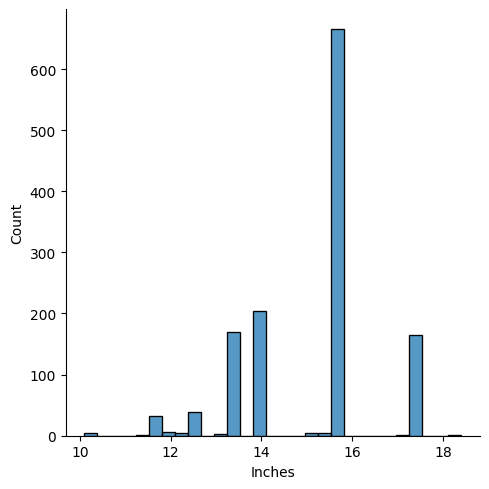

In [353]:
sns.displot(df['Inches'])

// sabse jyada juu latop haan 15.6 something maa he lie kar rahe haan 

// 2 - 3 spikes 15.6 13 -14 ke pass and 17 ke pass...

// but yaar kuch juu kam kitne sikes kaha pe haa pata nahi lag raha 
// lets plot scatter plot...

// these values are properly discete values... (more like categorical not continous..)




<Axes: xlabel='Inches', ylabel='Price'>

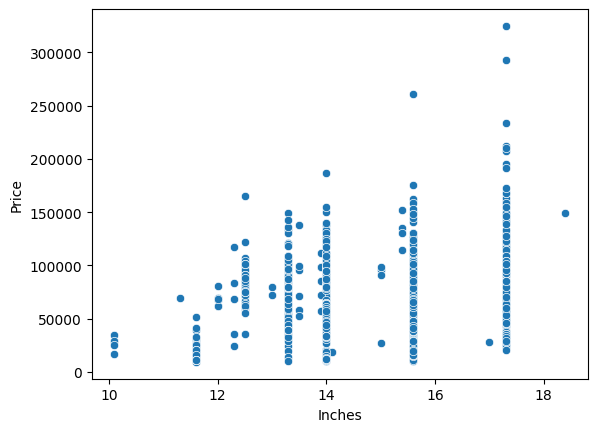

In [354]:
sns.scatterplot(x = df['Inches'], y = df['Price'])

// suu size it is ambigous means like we can sya it is varying but not much...
// so we have to justify is there a relationship between price and inches...
// there is a relationship but is not a very strong relationship...
// most of the laptop juu 13 - 15 inch me gir raha haan unka price similar...
// when laptop is very big... so some latops have huge price...
// strong correlation not there but there is a correlation...



// lets move on to next column because here the in formation is not in some standarised way...
// screen resolution...
// different laptops given in different way...
// value_counts laga kark dekhte haan how many types..

In [355]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

// common cheez yeh haa ke har type me resolution kaa value mil raha haa..
// words are inconsitent...
// one more piece of information hideen there laptop is touchscrren or not...
// ips panel there or not we would also get to know that...
// lets approach it one by one..


// lets do some feature engineerting and see if every latop is touchscrren or not 
// extra column add.. for it...

In [356]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [357]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [358]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
310,Lenovo,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.10,53226.72,0
319,Acer,Notebook,11.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4,128GB Flash Storage,Intel HD Graphics 405,Windows 10,1.40,25840.80,0
81,Apple,Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core i5 1.3GHz,8,512GB SSD,Intel HD Graphics 615,macOS,0.92,80452.80,0
1261,Asus,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8,512GB SSD,Intel HD Graphics 515,Windows 10,1.20,38841.12,0
1231,Razer,Gaming,14.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,1TB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95,186426.72,0


// 5 pe bhi naahi aaya ... 10 pe aayayga ... random sample uthayaga..

In [359]:
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
856,Asus,Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,1TB HDD,Intel HD Graphics 505,Windows 10,2.00,23922.7200,0
54,Acer,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,2.40,20459.5200,0
25,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,Windows 10,2.30,22305.1392,0
313,Acer,Notebook,15.6,Full HD 1920x1080,AMD A8-Series 7410 2.2GHz,8,256GB SSD,AMD Radeon R5,Windows 10,2.23,24988.3200,0
340,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,500GB HDD,Intel HD Graphics,Linux,2.20,14646.6720,0
236,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,Linux,2.10,20779.2000,0
540,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.20,74538.7200,1
842,HP,Notebook,17.3,1600x900,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.63,48484.8000,0
358,Dell,Notebook,15.6,Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8,2TB HDD,Intel HD Graphics 620,Windows 10,2.36,29696.6736,1
183,Toshiba,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,128GB SSD,Intel HD Graphics 620,Windows 10,2.00,42251.0400,0


<Axes: xlabel='Touchscreen'>

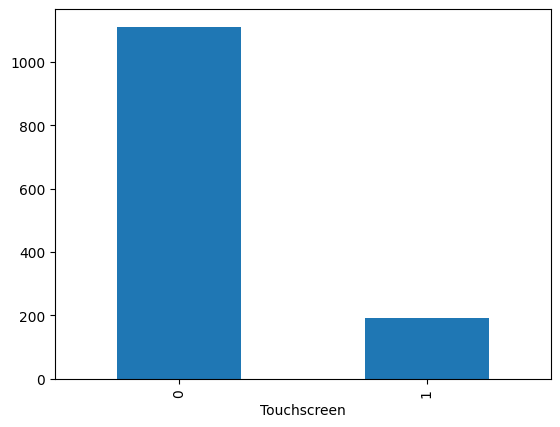

In [360]:
df['Touchscreen'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

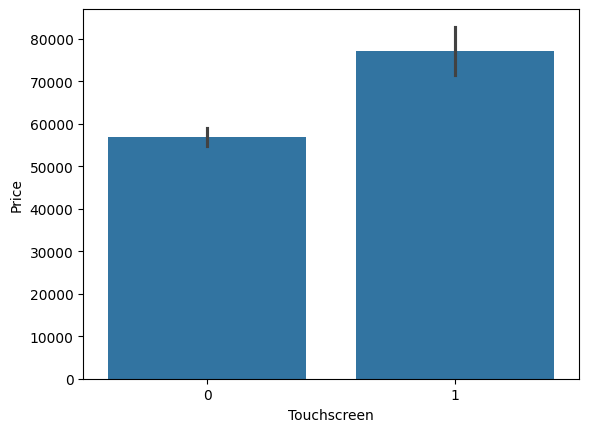

In [361]:
sns.barplot( x = df['Touchscreen'] , y = df['Price'])

// now lets make a column for ips panel...

In [362]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [363]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


// jaldi see iske upar bhi same anlysis karte haan 
// what is distribution...
// how many laptops are IPS 
// ans how many not..


<Axes: xlabel='Ips'>

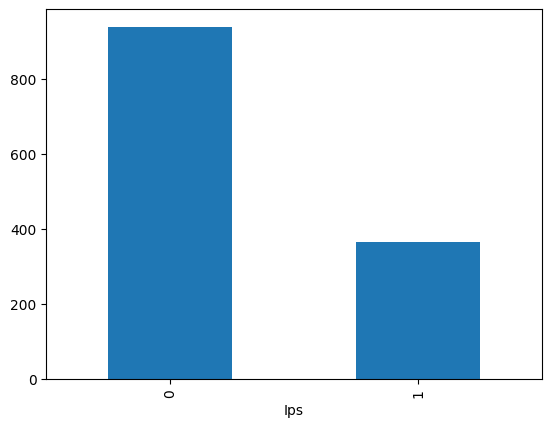

In [364]:
df['Ips'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Ips', ylabel='Price'>

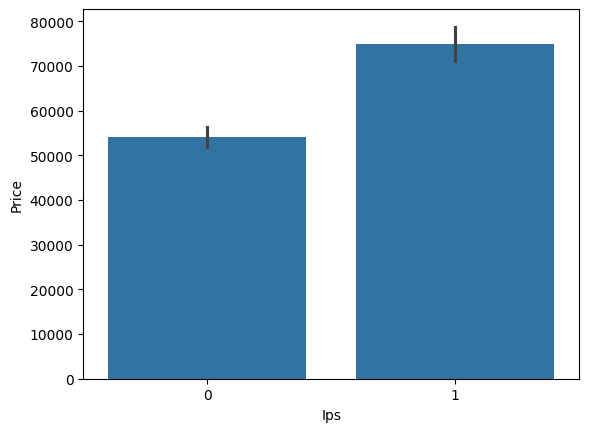

In [365]:
sns.barplot( x = df['Ips'] , y = df['Price'])

// looking like benefical as price varies so lets remain it 
// expand = true ... instead of giving me a new list it should create a data_frame... 
// splitting at x and how many times... 

In [366]:
new = df['ScreenResolution'].str.split('x',n =1,expand = True)

In [367]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


In [368]:
new.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


// temporary data frame me store kar leta haan let say new 

In [369]:
df['X_res'] = new[0]
df['Y_res'] = new[1]


In [370]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


// y resolution tuu sahi dikh raha ha.. it is in place..

In [371]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
1202,Dell,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Intel UHD Graphics 620,Windows 10,2.00,68464.80,1,0,Full HD / Touchscreen 1920,1080
832,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,1TB HDD,Nvidia GeForce 920,Linux,2.10,27652.32,0,0,Full HD 1920,1080
322,Asus,Notebook,14.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.00,58288.32,0,0,Full HD 1920,1080
761,Dell,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,16,256GB SSD,Intel HD Graphics 620,Windows 10,1.18,99047.52,0,0,Full HD 1920,1080
1293,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.60,47898.72,0,1,IPS Panel Full HD 1920,1080


// regular expressions... little bit study X_res see actual value extract karne ke liya... // pandas string methods 
// Regex = a Swiss Army knife → "look for anything that matches this rule."
// all these values would be inside list thats why used apply function...
// i dont want to create extra function thats why i created lambda...
// remove commas inside numbers if any 
// Uses regex to extract all numbers from the string
// x[0] takes the first number from that list.

In [372]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0] )

// regular expression kaa code jaha pee 3 yaa char digits huu sakte haan... 
// spaces ka dhayan rakh lee be..
// these all values are in a list , list see bahar nikalana haa.. 

In [373]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 142.6+ KB


// still there data type is object integer karna padega... X_res and y_res 
// kyuki wuh... 
// 15 columns now...

In [375]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


//  both integers now..

why x_resolution different and why y_resolution different kiya ?

// correlation nikal ke juu numeric column haa unka saath price kaa correlation samajh mee aajayaga...

In [377]:
df.corr(numeric_only=True) #only numeric kuu karta ha..

,Inches,Ram,Weight,Price,Touchscreen,Ips,X_res,Y_res
Inches,1.000000,0.237993,0.827631,0.068197,-0.361735,-0.114804,-0.071245,-0.095404
Ram,0.237993,1.000000,0.383874,0.743007,0.116984,0.206623,0.433121,0.424437
Weight,0.827631,0.383874,1.000000,0.210370,-0.294620,0.016967,-0.032880,-0.053846
Price,0.068197,0.743007,0.210370,1.000000,0.191226,0.252208,0.556529,0.552809
Touchscreen,-0.361735,0.116984,-0.294620,0.191226,1.000000,0.150512,0.351066,0.357930
Ips,-0.114804,0.206623,0.016967,0.252208,0.150512,1.000000,0.281457,0.289030
X_res,-0.071245,0.433121,-0.032880,0.556529,0.351066,0.281457,1.000000,0.994219
Y_res,-0.095404,0.424437,-0.053846,0.552809,0.357930,0.289030,0.994219,1.000000


In [378]:
corr_matrix = df.corr(numeric_only=True)

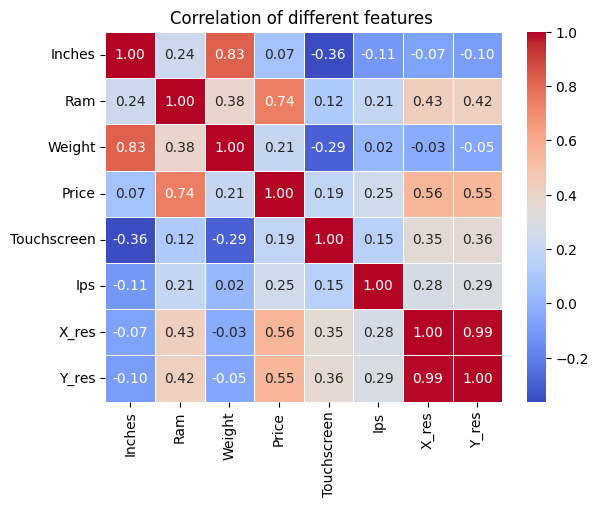

In [379]:
sns.heatmap(
    corr_matrix,      # The data to plot
    annot=True,       # Write the data values in the squares
    cmap='coolwarm',  # Use a color map that shows positive/negative well
    fmt='.2f',        # Format the annotations to two decimal places
    linewidths=.5     # Add lines between squares
)

plt.title('Correlation of different features ') # Add a title
plt.show()

only 8 numeric columns..
// i dont want corr with respect to everybody only wrt price... thats what matters to me...


In [380]:
df.corr(numeric_only=True)['Price'] 

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

// saw in diagram also ... inches ke saath not strong correaltion...
// ram , weight strong correaltion(interesting) lets see...
// x_res 
// y_res 
// sres and yres has huge strong correlation with the data..
// sres or yes increases price also increase as positive correaltion ...
// this is corrwlarion coeefficient...


// most computer nowdays have standard aspect ratio 16:9 something like that for most so it was expected...

// i am making a completely new column ppi more the ppi more expensive the laptop is generally
// as we can see from above i am not going to use x_res and y_res as there is multi-collinearity...
// inches kam nahi aa paa raha..
// thinking of commbing all these 3 into making one new column called ppi..
// screen pixel density (sharpness/clarity).(how many pixels are packed into each inch of the screen.)

In [381]:
df['ppi'] = ((df['X_res'])**2 + (df['Y_res'])**2 )**0.5/df['Inches'].astype('float')

In [382]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
 15  ppi               1303 non-null   float64
dtypes: float32(1), float64(3), int32(1), int64

In [384]:
df.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

// ppi ke sath bahut string correaltion...
// taking hints from other data sets how they clean it...
// what matters and how to check relationships...

// taken data from screen_resolution column so no need of screen_resolution column
// so i am dropping it...



In [385]:
df.drop(columns= ['ScreenResolution'],inplace = True)

In [386]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Inches       1303 non-null   float64
 3   Cpu          1303 non-null   object 
 4   Ram          1303 non-null   int32  
 5   Memory       1303 non-null   object 
 6   Gpu          1303 non-null   object 
 7   OpSys        1303 non-null   object 
 8   Weight       1303 non-null   float32
 9   Price        1303 non-null   float64
 10  Touchscreen  1303 non-null   int64  
 11  Ips          1303 non-null   int64  
 12  X_res        1303 non-null   int64  
 13  Y_res        1303 non-null   int64  
 14  ppi          1303 non-null   float64
dtypes: float32(1), float64(3), int32(1), int64(4), object(6)
memory usage: 142.6+ KB


// 15 columns still... 
// lets drop the three throiugh which we made one new column..

In [388]:
df.drop(columns= ['X_res'],inplace = True)
df.drop(columns= ['Y_res'],inplace = True)

In [389]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Inches       1303 non-null   float64
 3   Cpu          1303 non-null   object 
 4   Ram          1303 non-null   int32  
 5   Memory       1303 non-null   object 
 6   Gpu          1303 non-null   object 
 7   OpSys        1303 non-null   object 
 8   Weight       1303 non-null   float32
 9   Price        1303 non-null   float64
 10  Touchscreen  1303 non-null   int64  
 11  Ips          1303 non-null   int64  
 12  ppi          1303 non-null   float64
dtypes: float32(1), float64(3), int32(1), int64(2), object(6)
memory usage: 122.3+ KB


// now 13 columns...
// till screen-resultion eda done...
// cpu

// cpu column too many categories...


In [391]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

// 118 different categories.... most
common i5 ,i7 etc but still others are also there..
// thinking of making 5 differnt catgeroes from this 
// 3 --> intel i3,i5,i7
// 1 -> intel core celeron etc..
// 1 --> amd etc..

// my thoght process to get that 
// --> get first 3 words

// slist na banar i want string..

In [392]:
df['Cpu Name'] = df['Cpu'].apply(lambda x :" ".join(x.split()[0:3] ))

In [393]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Inches       1303 non-null   float64
 3   Cpu          1303 non-null   object 
 4   Ram          1303 non-null   int32  
 5   Memory       1303 non-null   object 
 6   Gpu          1303 non-null   object 
 7   OpSys        1303 non-null   object 
 8   Weight       1303 non-null   float32
 9   Price        1303 non-null   float64
 10  Touchscreen  1303 non-null   int64  
 11  Ips          1303 non-null   int64  
 12  ppi          1303 non-null   float64
 13  Cpu Name     1303 non-null   object 
dtypes: float32(1), float64(3), int32(1), int64(2), object(7)
memory usage: 132.5+ KB


// aab mujhe iss string pee kam karna haa..
// basically 3 different groups ... 
// mujhe string mila and on the basis of first three words 
// i group them into one of the three groups...

// lets make a function for that..

In [395]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    
    else :
        if text.split()[0] == 'Intel':
            return 'other Intel processor'
        
        else:
            return 'Amd processor'

In [396]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [397]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

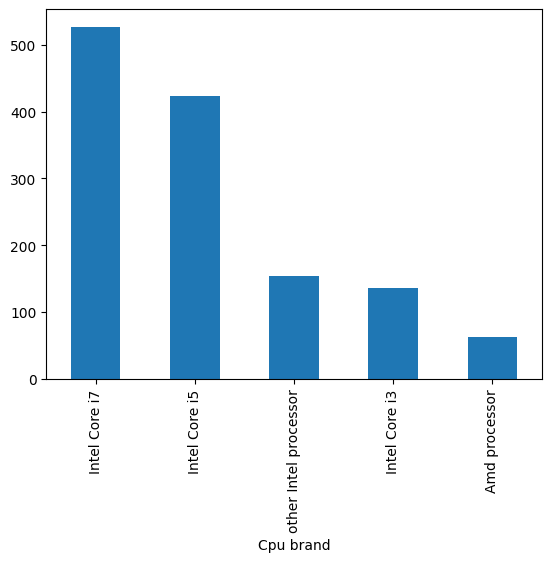

In [398]:
df['Cpu brand'].value_counts().plot(kind = 'bar')

// on thing to notice here is i7 is more than ip but when we earlier did that i7 came to be 146 and i5 190 
// but when different generation of i7 are added they surpass the count of i5...

In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Inches       1303 non-null   float64
 3   Cpu          1303 non-null   object 
 4   Ram          1303 non-null   int32  
 5   Memory       1303 non-null   object 
 6   Gpu          1303 non-null   object 
 7   OpSys        1303 non-null   object 
 8   Weight       1303 non-null   float32
 9   Price        1303 non-null   float64
 10  Touchscreen  1303 non-null   int64  
 11  Ips          1303 non-null   int64  
 12  ppi          1303 non-null   float64
 13  Cpu Name     1303 non-null   object 
 14  Cpu brand    1303 non-null   object 
dtypes: float32(1), float64(3), int32(1), int64(2), object(8)
memory usage: 142.6+ KB


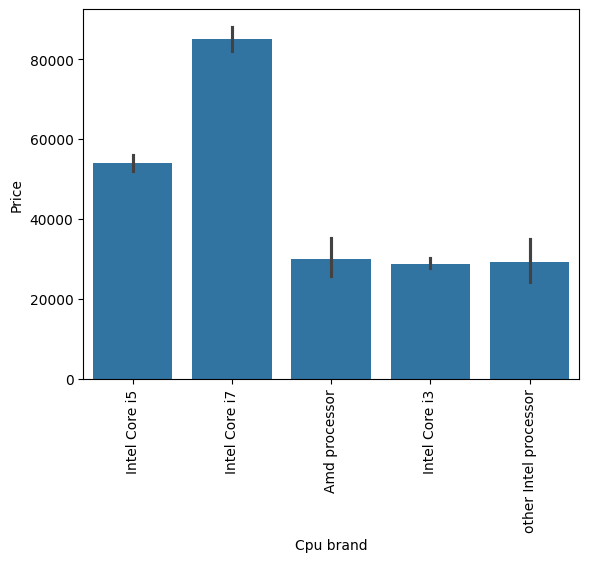

In [400]:
sns.barplot( x = df['Cpu brand'] , y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

// linear regression...

In [403]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression

# Step 1: Drop the original columns that have been processed or are not yet ready
# We keep 'Cpu brand' which you created and drop the original 'Cpu' and intermediate 'Cpu Name'
# We also drop 'Memory' and 'Gpu' for now as they require more complex feature engineering
X = df.drop(columns=['Price', 'Cpu', 'Memory', 'Gpu', 'Cpu Name'])
y = np.log(df['Price'])

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

# Step 3: Create a ColumnTransformer to apply one-hot encoding
# We apply OneHotEncoder to the categorical columns: 'Company', 'TypeName', 'OpSys', 'Cpu brand'
# The other columns are numeric and will be passed through without changes.
# Corrected indices for the categorical columns
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 4, 9])
], remainder='passthrough')
# Step 4: Define the model
step2 = LinearRegression()

# Step 5: Create and fit the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = pipe.predict(X_test)

print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.8187959180055929
MAE: 0.21303610797055372


In [ ]:
import pickle

# Save the pipeline object to a file
pickle.dump(pipe, open('pipe.pkl', 'wb')) 